In [0]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(seed=42)

In [4]:
!cat /proc/cpuinfo| grep "^proc" | wc -l

4


In [0]:
class RandomOptimizer(object):

  def __init__(self, alpha=0.1, n_samples: int = 100, dims: int = 10, rng = np.random.default_rng(seed=42)):
    self.alpha = alpha
    self.n_samples = n_samples
    self.dims = dims
    self.rng = rng
    self.history = []

  def sample_directions(self):
    """Generates n normally distributied unit vectors of dimentionality d each"""
    r = rng.normal(size=(self.n_samples, self.dims))
    r /= np.linalg.norm(r, axis=1).reshape(-1,1)
    return r

  def optimize(self, fn, w0, steps, diminishingLR=False):
    a = self.alpha
    self.history = []
    wk = w0
    for k in range(1, steps+1):
      directions = self.sample_directions()
      g = np.apply_along_axis(fn, axis=1, arr = wk + a*directions)
      direction_idx = np.argmin(g)
      if fn(wk + a*directions[direction_idx]) >= fn(wk):
        print(f"Stopping at step {k}")
        return wk
      wk = wk + a*directions[direction_idx]
      if diminishingLR:
        a = 1/k
      self.history.append(fn(wk))
    return wk

Min found at [ 5.40410170e-06 -3.72948992e-06]: 2.0000000000431135


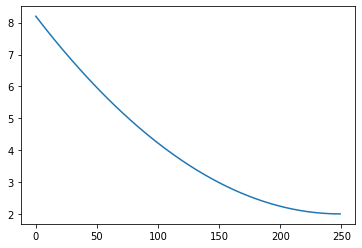

In [15]:
fn = lambda w: np.dot(w, w) + 2
opt = RandomOptimizer(alpha=0.01, dims=2, n_samples=10000)
w_min = opt.optimize(fn, np.array([1.5, 2]), 250)
print(f"Min found at {w_min}: {fn(w_min)}")
plt.plot(opt.history);

Min found at [-0.49991889 -3.19862182]: 1.0000000000002824


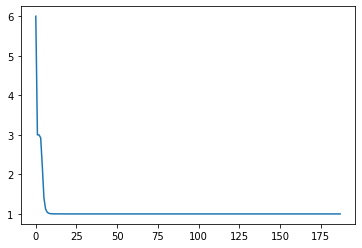

In [17]:
fn = lambda w: np.tanh(np.dot(np.array([4, 4]), w)) + np.max([np.max(4*np.dot(np.array([1, 0]), w**2)), 1]) + 1
opt = RandomOptimizer(alpha=1, dims=2, n_samples=1000)
w_min = opt.optimize(fn, np.array([2.0,2.0]), 188, True)
print(f"Min found at {w_min}: {fn(w_min)}")
plt.plot(opt.history);

Stopping at step 7
Min found at [0.84101682 0.70314067]: 0.02701339057572717


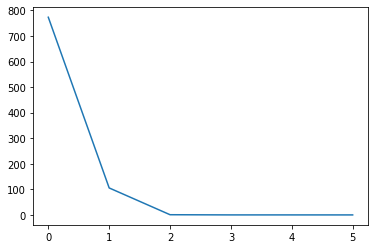

In [19]:
def fn(w):
  w1 = w[0]
  w2 = w[1]
  return 100*(w2-w1**2)**2 + (w1-1)**2
opt = RandomOptimizer(alpha=1, dims=2, n_samples=1000)
w_min = opt.optimize(fn, np.array([-2, -2]), 50)
print(f"Min found at {w_min}: {fn(w_min)}")
plt.plot(opt.history);

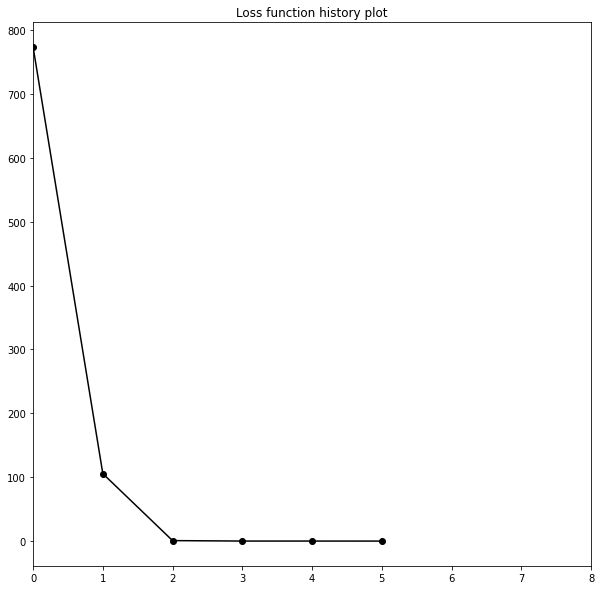

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(label="history plot")
ax.set_title("Loss function history plot")
ax.set_xlim(left=0, right=8)
ax.plot(opt.history, "-o", color="black");

In [21]:
def quadratic(w):
  return np.dot(w, w) + 2
quadratic(np.array([1, 2, 3]))

16

In [22]:
def ndim_input(N):
  w = np.zeros(shape=(N))
  w[0] = 1
  return w
ndim_input(2)

array([1., 0.])

In [24]:
rng = np.random.default_rng(seed=42)

def random_unit_directions(count: int, dims: int):
  r = rng.normal(size=(count, dims))
  r /= np.linalg.norm(r, axis=1).reshape(-1,1)
  return r
dds = random_unit_directions(4, 2)
dds 

array([[ 0.28118049, -0.9596549 ],
       [ 0.62368072,  0.78167919],
       [-0.83175713, -0.5551397 ],
       [ 0.37478326, -0.92711246]])

In [0]:
N = np.arange(1, 26)
P = np.array([100, 1000, 10000])
nn, pp = np.meshgrid(N, P)
nn = nn.ravel()
pp = pp.ravel()
props = []
for n, p in zip(nn, pp):
  w0 = ndim_input(n)
  current_value = quadratic(w0)
  dds = random_unit_directions(p, n)
  r = np.apply_along_axis(quadratic, axis=1, arr=w0 + dds)
  props.append(np.where(r < current_value, 1, 0).sum()/p)

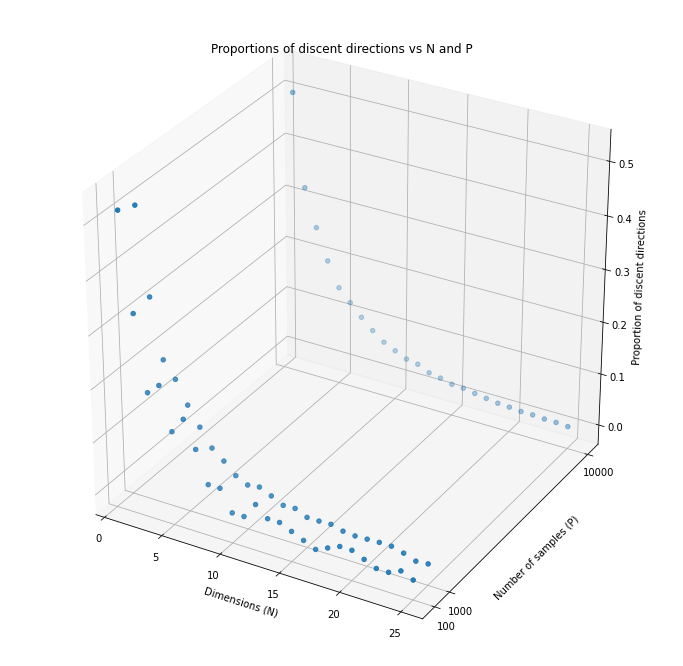

In [26]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection="3d", label="Proportions")
ax.set_title("Proportions of discent directions vs N and P")
ax.set_xlabel("Dimensions (N)")
ax.set_ylabel("Number of samples (P)")
ax.set_zlabel("Proportion of discent directions")
ax.set_yticks(P)
ax.scatter(nn, pp, props);

In [0]:
class CoordinateSearch(object):

  def __init__(self, alpha=1, dimensions: int = 2, rng = np.random.default_rng(seed=42)):
    self.dimensions = dimensions
    self.alpha = alpha
    self.rng = rng
    self.history = []

  def directions(self):
    return np.vstack((np.eye(self.dimensions), -np.eye(self.dimensions)))

  def optimize(self, fn, w0, steps):
    a = self.alpha
    self.history = []
    wk = w0
    dirs = self.directions()
    for k in range(1, steps + 1):
      g = np.apply_along_axis(fn, 1, wk + a*dirs)
      direction_idx = np.argmin(g)
      if fn(wk + a*dirs[direction_idx]) < fn(wk):
        wk = wk + a*dirs[direction_idx]
      else:
        wk = wk
        a /= 2 # or use 1/k
      r = fn(wk)
      if len(self.history) > 2 and abs(self.history[-1] - r) < 0.001 and abs(self.history[-2] - r) < 0.001:
        print(f"Stopping at {wk} at step {k}")
        return wk
      self.history.append(r)
    return wk

In [29]:
def fn(w):
  w1 = w[0]
  w2 = w[1]
  return 100*(w2-w1**2)**2 + (w1-1)**2
opt = RandomOptimizer(alpha=1, dims=2, n_samples=1000)
opt.optimize(fn, np.array([-2, -2]), 50)

Stopping at step 5


array([0.83747202, 0.70135603])

In [30]:
cs = CoordinateSearch(alpha=1, dimensions=2)
cs.optimize(fn, np.array([-2, -2]), 10)

Stopping at [0. 0.] at step 6


array([0., 0.])

In [0]:
def fn(w):
  return np.dot(w,w)

cs = CoordinateSearch()
cs.optimize(fn, np.array([1.5, 2]), 25)

Stopping at [0. 0.] at step 7


array([0., 0.])

In [31]:
def fn(w):
  w1 = w[0]
  w2 = w[1]
  return w1**2 + w2**2 + 2
opt = RandomOptimizer(alpha=1, dims=2, n_samples=1000)
print(opt.optimize(fn, np.array([3, 4]), 8))
cs = CoordinateSearch(alpha=1, dimensions=2)
print(cs.optimize(fn, np.array([3, 4]), 8))

Stopping at step 6
[-0.00267827  0.00204077]
[0. 0.]


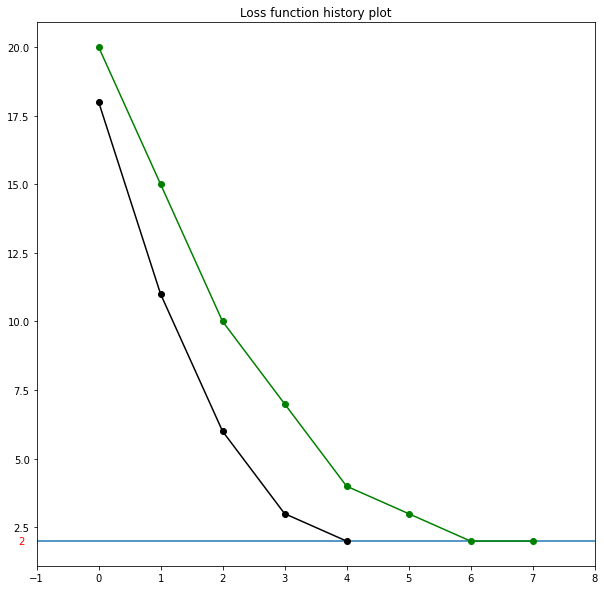

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(label="history plots")
ax.set_title("Loss function history plot")
ax.set_xlim(left=-1, right=8)
ax.axhline(2)
ax.text(-1.2,2, "{:.0f}".format(2), color="red", ha="right", va="center")
ax.plot(opt.history, "-o", color="black")
ax.plot(cs.history, "-o", color="green");

In [33]:
def fn(w):
  w1 = w[0]
  w2 = w[1]
  return 0.26*(w1**2+w2**2) - 0.48*w1*w2
fn([0, 0])
fn([98.16171817, 98.16      ])
fn([6,6])

1.4399999999999977

Stopping at [0.75   0.6875] at step 229
[0.75   0.6875]
[0.030625000000000013, 0.03031250000000002, 0.022499999999999964, 0.022499999999999964]


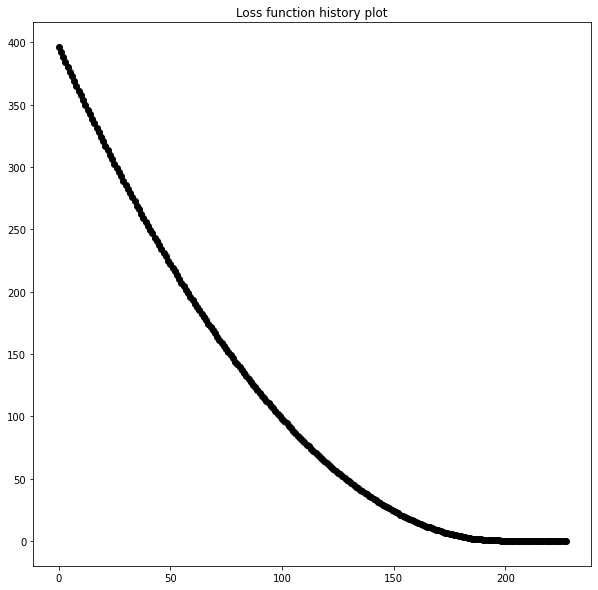

In [34]:
cs = CoordinateSearch(alpha=1, dimensions=2)
print(cs.optimize(fn, np.array([100,100]), 250))
print(cs.history[-4:])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(label="history plots")
ax.set_title("Loss function history plot")
ax.plot(cs.history, "-o", color="black");

In [36]:
opt = RandomOptimizer(alpha=1, dims=2, n_samples=1000)
opt.optimize(fn, np.array([100,100]), 10000)

Stopping at step 142


array([0.30036576, 0.29732814])

In [0]:
# coordinate descent

class CoordinateDescent(object):

  def __init__(self, alpha=1, dimensions: int = 2):
    self.dimensions = dimensions
    self.alpha = alpha
    self.history = []

  def optimize(self, fn, w0, steps):
    a = self.alpha
    self.history = []
    wk = w0
    wk1 = w0
    dirs = np.eye(self.dimensions)
    for k in range(1, steps + 1):
      for direction in range(self.dimensions):
        di = dirs[direction]
        curr = fn(wk)
        gp = fn(wk + a*di)
        gn = fn(wk - a*di)
        if gp < curr:
          wk = wk + a*di
        elif gn < curr: 
          wk = wk - a*di
        else:
          wk = wk
          a /= 2 # or use 1/k or use a/2 goes down  faster
      r = fn(wk)  
      self.history.append(r)
    return wk

In [38]:
def fn(w):
  w1 = w[0]
  w2 = w[1]
  return 0.26*(w1**2+w2**2) - 0.48*w1*w2
fn([0, 0])

0.0

[0.00082397 0.00076294]


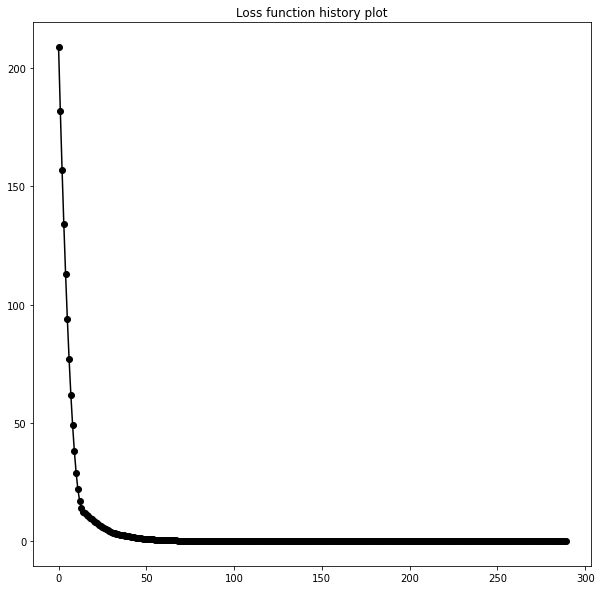

In [39]:
cood = CoordinateDescent()
print(cood.optimize(fn, np.array([33,3]), 290))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(label="history plots")
ax.set_title("Loss function history plot")
ax.plot(cood.history, "-o", color="black");

In [40]:
# Example learning rate schedule
for k in range(1,21):
  print(1/k)

1.0
0.5
0.3333333333333333
0.25
0.2
0.16666666666666666
0.14285714285714285
0.125
0.1111111111111111
0.1
0.09090909090909091
0.08333333333333333
0.07692307692307693
0.07142857142857142
0.06666666666666667
0.0625
0.058823529411764705
0.05555555555555555
0.05263157894736842
0.05


In [41]:
# Example learning rate schedule
a = 1
for k in range(1, 21):
  print(a)
  a  /= 2

1
0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125
0.0009765625
0.00048828125
0.000244140625
0.0001220703125
6.103515625e-05
3.0517578125e-05
1.52587890625e-05
7.62939453125e-06
3.814697265625e-06
1.9073486328125e-06
